In [2]:
import seaborn as sns #iris데이터 
import numpy as np
import pandas as pd # read_csv, get_dumies(원핫인코딩)
from sklearn.preprocessing import LabelEncoder # tensorflow v1참고
import tensorflow.keras.utils as utils
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

In [23]:
#1. 데이터 셋 준비하기
iris = sns.load_dataset('iris')
iris_x = iris.iloc[:,:-1].to_numpy()
iris_y = iris.iloc[:,-1]
print('iris 종류 : ', iris_y.unique())  # 3, 4, 5, 6, 7, 8

# 독립변수 scale 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(iris_x)
iris_x = scaler.transform(iris_x)

# 타겟변수 원핫인코딩(라벨링 전환) 후 numpy 배열로 변환
#방법1
# encoder = LabelEncoder()
# iris_y=encoder.fit_transform(iris_y)
# iris_y=utils.to_categorical(iris_y)

#방법2
# encoder = LabelEncoder()
# iris_y = encoder.fit_transform(iris_y)
# iris_y = pd.get_dummies(iris_y).values

#방법3
iris_y = pd.DataFrame(iris_y)
iris_y = pd.get_dummies(iris_y).values
iris_y

#훈련셋과 테스트셋 분리(7:3)
train_X, test_X, train_Y, test_Y = train_test_split(iris_x, iris_y, test_size=0.3, random_state=1)
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

# 2. 모델 구성하기
model = Sequential()
model.add(Input(11)) #의미있는 레이어가 아니고 input_dim만 지정
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=6, activation='softmax')) # 3,4,5,6,7,8 등급의 결과 합이 1

# # 3. 모델 학습과정 설정
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # 4. 모델 학습시키기
# earlyStopping = EarlyStopping(patience=20)
# hist = model.fit(train_X, train_Y, epochs=50, batch_size=200, validation_split=0.2, callbacks=[earlyStopping])

# #모델 학습과정 표시하기
# fig, loss_ax = plt.subplots(figsize=(12,8))
# loss_ax.plot(hist.history['loss'],'y',label='train_loss')
# loss_ax.plot(hist.history['val_loss'], 'g', label='val_loss')
# loss_ax.set_xlabel('epochs')
# loss_ax.set_ylabel('loss')

# acc_ax =loss_ax.twinx() #x축을 공유하는 acc_ax와 loss_ax
# acc_ax.plot(hist.history['accuracy'],'b',label='accuracy')
# acc_ax.plot(hist.history['val_accuracy'],'r',label='val_accuracy')
# acc_ax.set_ylabel('accuracy')

# loss_ax.legend(loc='upper left')
# acc_ax.legend(loc='lower left')
# plt.show()


iris 종류 :  ['setosa' 'versicolor' 'virginica']
(105, 4) (105, 3) (45, 4) (45, 3)


타겟변수가 될 와인 등급 종류 :  [5 6 7 4 8 3]
(1119, 11) (1119, 6) (480, 11) (480, 6)
Epoch 1/100
5/5 [==============================] - 0s 44ms/step - loss: 1.3482 - accuracy: 0.4626 - val_loss: 1.1941 - val_accuracy: 0.5446
Epoch 2/100
5/5 [==============================] - 0s 21ms/step - loss: 1.0906 - accuracy: 0.5899 - val_loss: 1.0418 - val_accuracy: 0.6250
Epoch 3/100
5/5 [==============================] - 0s 23ms/step - loss: 0.9992 - accuracy: 0.6123 - val_loss: 0.9882 - val_accuracy: 0.6071
Epoch 4/100
5/5 [==============================] - 0s 23ms/step - loss: 0.9521 - accuracy: 0.6101 - val_loss: 0.9642 - val_accuracy: 0.6071
Epoch 5/100
5/5 [==============================] - 0s 22ms/step - loss: 0.8987 - accuracy: 0.6480 - val_loss: 0.9614 - val_accuracy: 0.6116
Epoch 6/100
5/5 [==============================] - 0s 22ms/step - loss: 0.8638 - accuracy: 0.6492 - val_loss: 0.9699 - val_accuracy: 0.6205
Epoch 7/100
5/5 [==============================] - 0s 28ms/step - loss: 0.8193 - accur

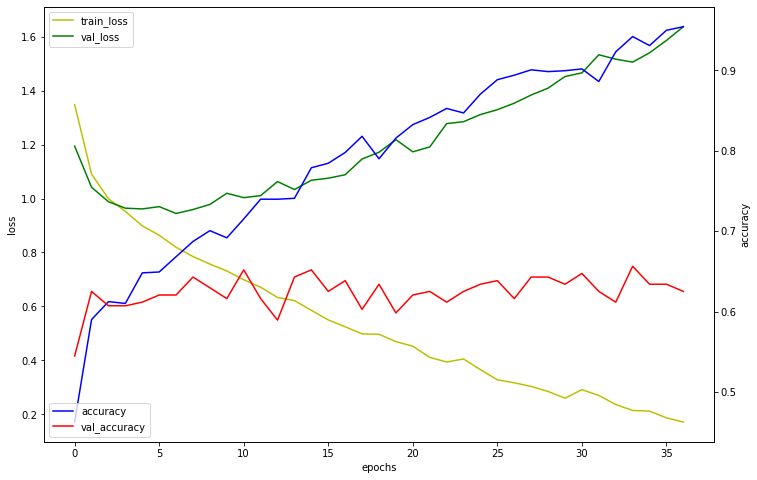

In [27]:
#1. 데이터 셋 준비하기
redwine = pd.read_csv('data/winequality-red.csv',sep=';')
redwine_x = redwine.iloc[:,:-1].to_numpy()  # to_numpy()함수는 values와 유사
redwine_y = redwine.iloc[:,-1]
print('타겟변수가 될 와인 등급 종류 : ', redwine_y.unique())  # 3, 4, 5, 6, 7, 8

# 독립변수 scale 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(redwine_x)
redwine_x = scaler.transform(redwine_x)

# 타겟변수 원핫인코딩(라벨링 전환) 후 numpy 배열로 변환
redwine_y = pd.get_dummies(redwine_y).to_numpy()

#훈련셋과 테스트셋 분리(7:3)
train_X, test_X, train_Y, test_Y = train_test_split(redwine_x, redwine_y, test_size=0.3, random_state=1)
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

# 2. 모델 구성하기
model = Sequential()
model.add(Input(11)) #의미있는 레이어가 아니고 input_dim만 지정
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=1000, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=2000, activation='relu'))
model.add(Dense(units=6, activation='softmax')) # 3,4,5,6,7,8 등급의 결과 합이 1

# 3. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습시키기
earlyStopping = EarlyStopping(patience=30)
hist = model.fit(train_X, train_Y, epochs=100, batch_size=200, validation_split=0.2, callbacks=[earlyStopping])

#모델 학습과정 표시하기
fig, loss_ax = plt.subplots(figsize=(12,8))
loss_ax.plot(hist.history['loss'],'y',label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'g', label='val_loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')

acc_ax =loss_ax.twinx() #x축을 공유하는 acc_ax와 loss_ax
acc_ax.plot(hist.history['accuracy'],'b',label='accuracy')
acc_ax.plot(hist.history['val_accuracy'],'r',label='val_accuracy')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()